# Lab 7 ALCOA
Anna Panfil
Igor Czudy

# Imports

In [1]:
from dateutil.parser import parse
from datetime import datetime
import random

import plotly.express as px

# Data model

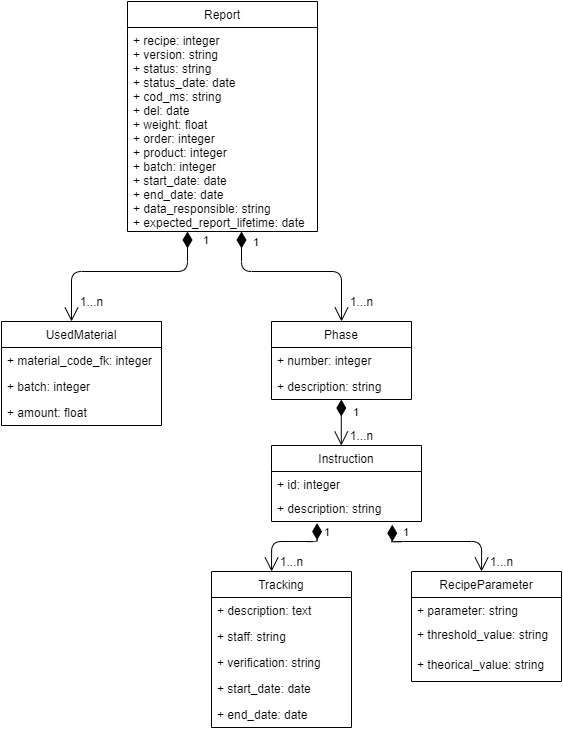

In [2]:
example_report = {
    'recipe': '123', 
    'version': 'Version 1.0', 
    'status': 'Saved', 
    'status_date': '27/10/1996', 
    'cod_ms': '', 
    'del': '27-10-1996', 
    'weight': '0.0', 
    'order': '1', 
    'product': '45', 
    'batch': '1', 
    'start_date': '05/01/2010 00:00:00', 
    'end_date': '09/01/2010 00:00:00', 
    'data_responsible': 'DR', 
    'expected_report_lifetime': '01/01/1970 00:00:00', 
    'used_materials': [
        {'material_code_fk': '12', 'batch': '23', 'amount': '5'}
    ], 
    'phases': [
        {
            'number': '1', 
            'description': 'Phase #1', 
            'instructions': [
                {
                    'id': '1', 
                    'description': 'Description', 
                    'recipe_parameters': [
                        {'parameter': 'speed', 'threshold_value': '( 20 - 40 )', 'theorical_value': '50 rpm'},
                        {'parameter': 'temperature', 'threshold_value': '( 20 - 40 )', 'theorical_value': '30 ºC'},
                        {'parameter': 'material', 'threshold_value': '( 20 - 40 )', 'theorical_value': '60 Kg'},
                    ],
                    'trackings': [
                        {'description': 'speed 39 rpm', 'staff': 'Mr Lopez', 'verification': 'Automatic', 'start_date': '21/01/2010 00:00:00', 'end_date': '21/01/2010 00:00:05'},
                        {'description': 'temperature 24 ºC', 'staff': 'Mr Lopez', 'verification': 'Automatic', 'start_date': '21/01/2010 00:00:00', 'end_date': '21/01/2010 00:00:05'},
                        {'description': 'material 65 Kg', 'staff': 'Mr Lopez', 'verification': 'Automatic', 'start_date': '21/01/2010 00:00:00', 'end_date': '21/01/2010 00:00:05'}
                    ] 
                } 
            ]
        }
    ]
}

# Block I. Data Synthesis

Data synthesis, batch report generation

Make a data generator that creates batch reports following the structure of the example shown previously.

There are fields that may have empty values, such as:
  - phases -> instructions -> trackings -> description
  - phases -> instructions -> trackings -> staff
  - phases -> instructions -> trackings -> start_date
  - phases -> instructions -> trackings -> end_date
  - expected_report_lifetime

The "phases -> instructions -> trackings -> description" text follows the format: "parameter value measure_unit"

All the datetimes follow the format: "day/month/year hours:minutes:seconds"

For the trackings and the recipe parameters it must be used the three parameter types found in the example "phases -> instructions -> recipe_parameters": speed, temperature and material.

For the recipe parameters, every "threshold_value" range must be "( 20 - 40 )".

Every tracking description value (speed, temperature or material) must follow a distribution with mean=30 and std=20.

## 4.1.3.1. Implement the "used materials" generator (Example)


In [3]:
def generate_used_materials():
    materials = []
    
    for material_index in range(random.randint(5,10)):
        materials.append(
          {
            'material_code_fk': material_index, 
            'batch': random.randint(1, 10), 
            'amount': random.random() * 10
          }    
        )

    return materials

## 4.1.3.2. Implement the "recipe parameters" generator

In [4]:
UNITS = {"speed": 'rpm', "temperature": 'ºC', "material": 'Kg'}
DATE_FORMAT = "%d/%m/%Y %H:%M:%S"
MIN_DATE = '-20y'
MAX_DATE = '-16y'
NULL_PROBABILITY = 0.1

In [5]:
#  'recipe_parameters': [
#                         {'parameter': 'speed', 'threshold_value': '( 20 - 40 )', 'theorical_value': '50 rpm'},
#                         {'parameter': 'temperature', 'threshold_value': '( 20 - 40 )', 'theorical_value': '30 ºC'},
#                         {'parameter': 'material', 'threshold_value': '( 20 - 40 )', 'theorical_value': '60 Kg'},
#                     ],

def generate_recipe_parameters():
    recipe_parameters = []    
    for _ in range(random.randint(5,10)):
        parameter = random.choice(['speed', 'temperature', 'material'])
        recipe_parameters.append(
          {
            'parameter': parameter,
            'threshold_value': '( 20 - 40 )',
            'theorical_value': f'{random.normalvariate(30, 20)} {UNITS[parameter]}'
          }    
        )
    return recipe_parameters

## 4.1.3.3. Implement the "trackings" generator

In [6]:
# {'description': 'speed 39 rpm', 'staff': 'Mr Lopez', 'verification': 'Automatic', 'start_date': '21/01/2010 00:00:00', 'end_date': '21/01/2010 00:00:05'},
from faker import Faker
fake = Faker()

def generate_trackings():
    trackings = []
    
    for _ in range(random.randint(5,10)):
        parameter = random.choice(['speed', 'temperature', 'material'])
        trackings.append(
            {
                'description': f'{parameter} {random.normalvariate(30, 20)} {UNITS[parameter]}' if random.random() > NULL_PROBABILITY else None,
                'staff': fake.name() if random.random() > NULL_PROBABILITY else None,    
                'verification': 'Automatic',
                'start_date': fake.date_time_between(start_date=MIN_DATE, end_date=MAX_DATE).strftime(DATE_FORMAT) if random.random() > NULL_PROBABILITY else None,
                'end_date': fake.date_time_between(start_date=MIN_DATE, end_date=MAX_DATE).strftime(DATE_FORMAT) if random.random() > NULL_PROBABILITY else None
            }    
        )
    return trackings

## 4.1.3.4.	Implement the “instructions” generator

Use the generate_trackings and generate_recipe_parameters methods defined previously

In [7]:
def generate_instructions():
    instructions = []
    
    for id in range(random.randint(5,10)):
        
        instructions.append(
            {
                'id': id, 
                'description': fake.text(random.randint(10, 100)), 
                'recipe_parameters': generate_recipe_parameters(),
                'trackings': generate_trackings()
            }    
        )
    
    return instructions

## 4.1.3.5 5.	Implement the “phases” generator

Use the generate_instructions method defined previously

In [8]:
def generate_phases():
    phases = []

    for id in range(random.randint(5,10)):
        phases.append(
            {
                'number': id, 
                'description': f'Phase #{id}', 
                'instructions': generate_instructions()
            }
        )
    
    return phases

# 4.1.3.6.	Implement the "report" generator

Use the generate_phases and generate_used_materials methods defined previously

In [9]:
def generate_report(index=1):
    report = {
      'recipe': 123, 
      'version': 'Version 1.0', 
      'status': 'Saved', 
      'status_date': '27/10/1996', 
      'cod_ms': '', 
      'del': '27-10-1996', 
      'weight': 0.0, 
      'order': index, 
      'product': 27, 
      'batch': index, 
      'start_date': fake.date_time_between(start_date=MIN_DATE, end_date=MAX_DATE).strftime(DATE_FORMAT),
      'end_date': fake.date_time_between(start_date=MIN_DATE, end_date=MAX_DATE).strftime(DATE_FORMAT),
      'data_responsible': 'DR', 
      'expected_report_lifetime': fake.date_time_between(start_date=MIN_DATE, end_date="+1y").strftime(DATE_FORMAT) if random.random() > NULL_PROBABILITY else None,
      'used_materials': generate_used_materials(), 
      'phases': generate_phases()
    }

    return report

In [10]:
reports = [generate_report(index) for index in range(1,6)]

# Block II. ALCOA+ Analysis Principle Implementation

- Option 1: Attributable, Contemporaneous, Consistent, Enduring, Available
- Option 2: Attributable, Contemporaneous, Complete, Enduring, Available
- Option 3: Attributable, Contemporaneous, Accurate, Enduring, Available

Option chosen: 3

## Attributable

### 4.2.3.1.	Implement the Attributable score calculator

score = assigned staff on tracking / total staff on tracking

σ 𝑎𝑠𝑠𝑖𝑔𝑛𝑒𝑑 𝑠𝑡𝑎𝑓𝑓 𝑡ℎ𝑎𝑡 𝑖𝑠 𝒗𝒆𝒓𝒊𝒇𝒊𝒆𝒅 𝑖𝑛 𝑡ℎ𝑒 𝑠𝑡𝑎𝑓𝑓 𝑓𝑖𝑒𝑙𝑑𝑠 /
𝑛𝑢𝑚𝑏𝑒𝑟 𝑜𝑓 𝑡𝑜𝑡𝑎𝑙 𝑠𝑡𝑎𝑓𝑓 𝑓𝑖𝑒𝑙𝑑𝑠

In [11]:
def attributable_score(report):
  assigned_personel = 0
  total_personel = 0

  for phase in report["phases"]:
    for instruction in phase["instructions"]:
      for tracking in instruction["trackings"]:
        total_personel += 1
        if tracking["staff"] is not None:
          assigned_personel += 1

  if total_personel == 0:
    return 100
  else:
    return (assigned_personel / total_personel) * 100

## Contemporaneous

### 4.2.3.2.	Implement the Contemporaneous score calculator

score = assigned dates on trackings / total dates on trackings

In [12]:
def contemporaneous_score(report):
  assigned_dates = 0
  total_dates = 0

  for phase in report["phases"]:
    for instruction in phase["instructions"]:
      for tracking in instruction["trackings"]:
        total_dates += 1
        if tracking["start_date"] is not None and tracking["end_date"] is not None:
          assigned_dates += 1

  if total_dates == 0:
    return 100
  else:
    return (assigned_dates / total_dates) * 100

## Accurate

### 4.2.3.3.	Implement the Accurate score calculator


Rule: detect values in tracking within range specified in recipe parameters

In [13]:
# Rules for accuracy

def rule_range(report):
  total_range_values = 0
  right_range_values = 0

  ranges = dict()

  for phase in report["phases"]:
    for instruction in phase["instructions"]:
      for recipe_parameter in instruction["recipe_parameters"]:
        ranges[recipe_parameter["parameter"]] = recipe_parameter["threshold_value"]

      for tracking in instruction["trackings"]:
        total_range_values += 1
        if tracking["description"] is not None:
          parameter, value, _ = tracking["description"].split()
          if parameter in ranges.keys():
            min, max = ranges[parameter].translate({ord("("): "", ord(")"): ""}).split("-")
            if int(min) < float(value) < int(max):
              right_range_values += 1        

  if total_range_values == 0:
    return 100.0
  else:
    return (right_range_values / total_range_values) * 100.0

rules = [rule_range]

In [14]:
def accurate_score(report):
  scores = []

  for rule in rules:
    scores.append(rule(report))

  if len(scores) == 0:
    score = 0.0
  else:
    score = sum(scores) / len(scores)

  return score

## Complete

### 4.2.3.4.	Implement the Complete score calculator

score = fields filled on trackings / total fields on trackings

In [15]:
def complete_score(report):
  filled_fields = 0
  total_fields = 0

  for phase in report["phases"]:
    for instruction in phase["instructions"]:
      for tracking in instruction["trackings"]:
        filled_fields += sum([0 if elem is None else 1 for elem in tracking.values()])
        total_fields += len(tracking.values())

  if total_fields == 0:
    return 100
  else:
    return (filled_fields / total_fields) * 100

## Consistent

### 4.2.3.5.	Implement the Consistent score calculator

score = dates following sequence on trackings / total date sequences on trackings

In [16]:
def consistent_score(report):
  dates_following_sequence = 0
  total_date_sequences = 0

  for phase in report["phases"]:
    for instruction in phase["instructions"]:
      for tracking in instruction["trackings"]:
        total_date_sequences += 1
        if tracking["start_date"] is not None and tracking["end_date"] is not None \
          and datetime.strptime(tracking["start_date"], DATE_FORMAT) < datetime.strptime(tracking["end_date"], DATE_FORMAT):
          dates_following_sequence += 1


  if total_date_sequences == 0:
    return 100
  else:
    return (dates_following_sequence / total_date_sequences) * 100

## Enduring

### 4.2.3.6.	Implement the Enduring score calculator

score = 100 if expected report lifetime > today else 0


In [17]:
def enduring_score(report):
  return 100 if report["expected_report_lifetime"] is not None and datetime.strptime(report["expected_report_lifetime"], DATE_FORMAT) > datetime.now() else 0.0

## Available

### 4.2.3.7.	Implement the Available score calculator


score = 100 if expected report lifetime exists else 0

In [18]:
def available_score(report):
  return 100 if report["expected_report_lifetime"] is not None else 0.0

## ALCOA+ Principle Suite


In [19]:
def compute_alcoa(report):
  return {
      'attributable': int(attributable_score(report)),
      'contemporaneous': int(contemporaneous_score(report)),
      'accurate': int(accurate_score(report)),
      'complete': int(complete_score(report)),
      'consistent': int(consistent_score(report)),
      'enduring': int(enduring_score(report)),
      'available': int(available_score(report))
  }

In [20]:
scores = []

for report in reports:
  scores.append(compute_alcoa(report))

for score in scores:
  print(score)

{'attributable': 87, 'contemporaneous': 80, 'accurate': 38, 'complete': 91, 'consistent': 39, 'enduring': 0, 'available': 100}
{'attributable': 87, 'contemporaneous': 77, 'accurate': 35, 'complete': 90, 'consistent': 39, 'enduring': 0, 'available': 100}
{'attributable': 92, 'contemporaneous': 79, 'accurate': 36, 'complete': 92, 'consistent': 40, 'enduring': 0, 'available': 100}
{'attributable': 89, 'contemporaneous': 79, 'accurate': 35, 'complete': 92, 'consistent': 39, 'enduring': 0, 'available': 100}
{'attributable': 87, 'contemporaneous': 82, 'accurate': 33, 'complete': 91, 'consistent': 43, 'enduring': 0, 'available': 100}


# Execise 3 - Data Visualization
Single batch report data visualization

Generate a plot to visualize the ALCOA+ scores of a single batch report analysis

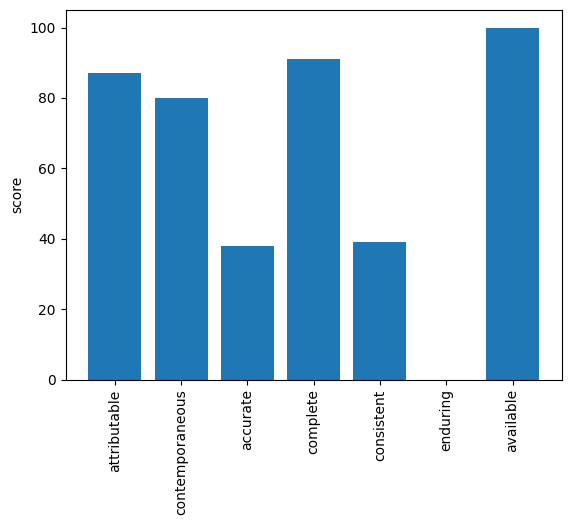

In [21]:
import matplotlib.pyplot as plt
plt.bar(scores[0].keys(), scores[0].values())
plt.xticks(rotation=90)
plt.ylabel("score")
plt.show()

We choose barplot, because it's very easy to understand. All of the scores are in the same range – 0 to 100, which makes them comparable in the same scale.

Multiple batch report data visualization

Generate a plot to visualize the ALCOA+ scores of a multiple batch report analysis

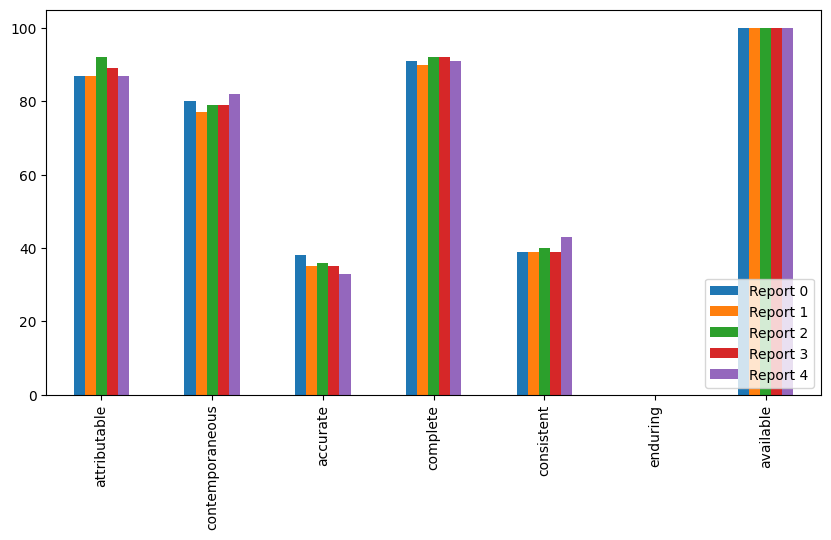

In [22]:
import pandas as pd
scores_df = pd.DataFrame(scores)

scores_df.T.plot.bar(stacked=False, figsize=(10, 5))
plt.legend([f"Report {i}" for i in range(len(scores_df))], loc='lower right')

In [26]:
import plotly.graph_objects as go
categories = list(scores[0].keys())

fig = go.Figure()

for i, report in enumerate(scores):
  fig.add_trace(go.Scatterpolar(
        r=list(report.values()),
        theta=categories,
        fill="tonext",
        name=f'Report #{i}'
  ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 100]
    )),
  showlegend=True
)

fig.show()

For the multiple batch analysis we can also choose a barplot. It's still easy to understand and the results are quite easy to compare. To improve the insight we can also use radar chart, which may provide faster view into differences.

# Overall evaluation
1.	The data generator must be able to make batch reports that have multiple possible values
2.	The data generator must be able to make a set of batch reports where every principle score may have a difference of 5-10 points at least (for example, computing the Attributable score on multiple batch reports generates an interval of 45 to 51 points). 
3.	The ALCOA+ analysis principle implementation must follow the specification of the Jupyter notebook
4.	The single batch report plotting and the multiple batch report plotting must be justified.
